In [55]:
import numpy as np
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os
import itertools

folder_of_reading_text = '/Users/rahulbrito/Documents/projects/infantvoice/data/phoneme_text_of_readings'

In [68]:
readings = {f: open(os.path.join(folder_of_reading_text,f), 'r').read().strip() for f in os.listdir(folder_of_reading_text)}
readings.keys(), readings

(dict_keys(['3 The Very Hungry Caterpillar.txt', '2 Owl Babies.txt', '1 Good Night Moon.txt', '5 I Love You Stinky Face.txt', '4 Guess How Much I Love You.txt']),
 {'3 The Very Hungry Caterpillar.txt': '\ufeffɑn ˈsʌnˌdeɪ ˈmɔrnɪŋ ðə wɔrm sʌn keɪm ʌp ænd – pɑp! – aʊt ʌv ði ɛg keɪm ə ˈtaɪni ænd ˈvɛri ˈhʌŋgri ˈkætəˌpɪlər.\nhi ˈstɑrtəd tu lʊk fɔr sʌm fud.\nɑn ˈmʌndi hi eɪt θru wʌn ˈæpəl. bʌt hi wʌz stɪl ˈhʌŋgri.\nɑn ˈtuzdi hi eɪt θru tu pɛrz, bʌt hi wʌz stɪl ˈhʌŋgri.\nɑn ˈwɛnzdi hi eɪt θru θri plʌmz, bʌt hi wʌz stɪl ˈhʌŋgri.\nɑn ˈθɜrzˌdeɪ hi eɪt θru fɔr ˈstrɔˌbɛriz, bʌt hi wʌz stɪl ˈhʌŋgri.\nɑn ˈfraɪdi hi eɪt θru faɪv ˈɔrənʤəz, bʌt hi wʌz stɪl ˈhʌŋgri.\nɑn ˈsætərdi hi eɪt θru wʌn pis ʌv ˈʧɔklət keɪk, wʌn ˈaɪˌskrim koʊn, wʌn ˈpɪkəl, wʌn slaɪs ʌv swɪs ʧiz, wʌn slaɪs ʌv səˈlɑmi, wʌn ˈlɑliˌpɑp, wʌn pis ʌv ˈʧɛri paɪ, wʌn ˈsɔsəʤ, wʌn ˈkʌpˌkeɪk, ænd wʌn slaɪs ʌv ˈwɔtərˌmɛlən. ðæt naɪt hi hæd ə stomachache!',
  '2 Owl Babies.txt': '\ufeffwʌns ðər wər θri ˈbeɪbi aʊlz:\nˈsɛrə ənd ˈpɜrsi ənd bɪl.\nðeɪ

In [3]:
os.listdir(folder_of_reading_text)

['3 The Very Hungry Caterpillar.txt',
 '2 Owl Babies.txt',
 '1 Good Night Moon.txt',
 '5 I Love You Stinky Face.txt',
 '4 Guess How Much I Love You.txt']

In [35]:
text = {}
for passage, text_raw in readings.items():
    #if passage == '2 Owl Babies.txt': #or passage == '1 Good Night Moon.txt':
    text_no_punc = text_raw.translate(str.maketrans('', '', string.punctuation))
    text_no_newline = text_no_punc.replace("\n", "")
    text_nocomma_apos = text_no_newline.replace("ˈ", "").replace("ˌ", " ")
    text_w_space = text_nocomma_apos.replace("\ufeff","")
    text_tight = text_w_space.replace(" ","").replace('”', "").replace("“","")
    text_wide = text_tight.replace("", " ")
    text[passage] = text_wide
text   

{'3 The Very Hungry Caterpillar.txt': ' ɑ n s ʌ n d e ɪ m ɔ r n ɪ ŋ ð ə w ɔ r m s ʌ n k e ɪ m ʌ p æ n d – p ɑ p – a ʊ t ʌ v ð i ɛ g k e ɪ m ə t a ɪ n i æ n d v ɛ r i h ʌ ŋ g r i k æ t ə p ɪ l ə r h i s t ɑ r t ə d t u l ʊ k f ɔ r s ʌ m f u d ɑ n m ʌ n d i h i e ɪ t θ r u w ʌ n æ p ə l b ʌ t h i w ʌ z s t ɪ l h ʌ ŋ g r i ɑ n t u z d i h i e ɪ t θ r u t u p ɛ r z b ʌ t h i w ʌ z s t ɪ l h ʌ ŋ g r i ɑ n w ɛ n z d i h i e ɪ t θ r u θ r i p l ʌ m z b ʌ t h i w ʌ z s t ɪ l h ʌ ŋ g r i ɑ n θ ɜ r z d e ɪ h i e ɪ t θ r u f ɔ r s t r ɔ b ɛ r i z b ʌ t h i w ʌ z s t ɪ l h ʌ ŋ g r i ɑ n f r a ɪ d i h i e ɪ t θ r u f a ɪ v ɔ r ə n ʤ ə z b ʌ t h i w ʌ z s t ɪ l h ʌ ŋ g r i ɑ n s æ t ə r d i h i e ɪ t θ r u w ʌ n p i s ʌ v ʧ ɔ k l ə t k e ɪ k w ʌ n a ɪ s k r i m k o ʊ n w ʌ n p ɪ k ə l w ʌ n s l a ɪ s ʌ v s w ɪ s ʧ i z w ʌ n s l a ɪ s ʌ v s ə l ɑ m i w ʌ n l ɑ l i p ɑ p w ʌ n p i s ʌ v ʧ ɛ r i p a ɪ w ʌ n s ɔ s ə ʤ w ʌ n k ʌ p k e ɪ k æ n d w ʌ n s l a ɪ s ʌ v w ɔ t ə r m ɛ l ə n ð æ t n a ɪ t h i h 

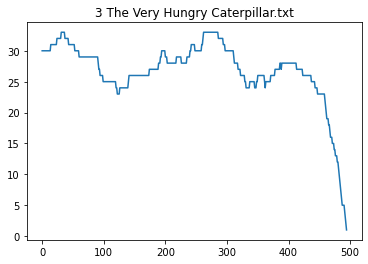

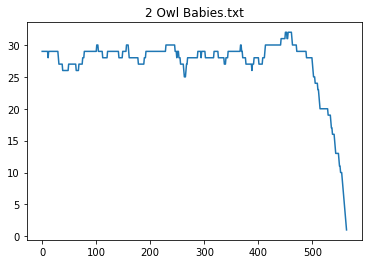

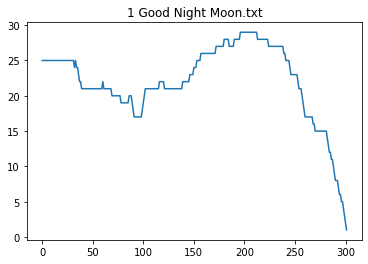

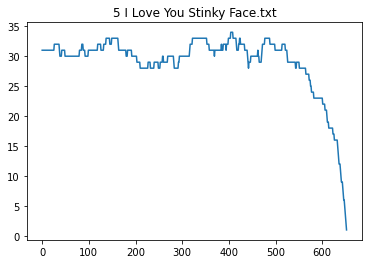

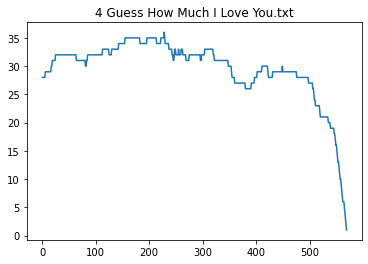

In [64]:
window_size = 100 * 2 #*2 because I inserted a space between each phoneme

#calculates the number of unique phonemes within a sliding window across each separarte reading 
#n_in_segment = [np.unique(t[i:i+window_size].split(' ')).shape[0] for t in text for i in range(0,len(t))]

n_in_segment = {p:
                [np.unique(t[i:i+window_size].split(' ')).shape[0] 
                 for i in range(0,len(t),2)] 
                for p,t in text.items()}

for passage, seg in n_in_segment.items():
    plt.figure()
    sns.lineplot(x=range(len(seg)), y=seg)
    plt.title(passage)

In [65]:
len(text['1 Good Night Moon.txt'])

603

In [66]:
len(n_in_segment['1 Good Night Moon.txt'])

302